# Gravity and the isostatic state of the lithosphere

**Goal:** Determine the relationship between observations (gravity disturbances and topography) and the isostatic state of the lithosphere.

The isostatic state of the lithosphere (under an Airy or Pratt model) is tied to its density structure. As such, we would expect observations of gravity disturbances to yield some knowlegde on isostasy since they are sensitive to variations in density. In this practical, we will work global observations of gravity and topography, determine a physical/mathematical relationship (a model) between these data and isostasy, test whether our model fits the observations, and reason about why is does or does not. 

## Import the required libraries

Load the required software to load the data, make maps, and perform calculations.

In [1]:
# For arrays and linear algebra
import numpy as np
# To load and manipulate grids
import xarray as xr
# To make figures and maps
import matplotlib.pyplot as plt
# To add cartographic projections to our maps
import cartopy.crs as ccrs

## The data

**Download:** [global-gravity.nc](https://github.com/leouieda/lithosphere/raw/main/data/global-gravity.nc) (place it in the same folder as this notebook)

The gravity and topography data we will use are stored in a [netCDF](https://en.wikipedia.org/wiki/NetCDF) file, which is a very common standard for storing and distributing gridded data. It's used throughout the Earth, ocean, and climate sciences and can be read an manipulated with most software platforms. 

The gravity grid was generated from the [EIGEN-6C4 spherical harmonic model](https://doi.org/10.5880/icgem.2015.1) through the [ICGEM webservice](http://icgem.gfz-potsdam.de/home). It includes two grids: the gravity disturbance calculated with the WGS84 ellipsoid and the Bouguer gravity disturbance calculated using a topography density of 2670 kg/m³. The data for both grids was generated on top of the Earth's surface (the water surface in the oceans and topography on land).

The topography grid is a downsampled version of [ETOPO1](https://doi.org/10.7289/V5C8276M) and includes a version smoothed using a Gaussian filter with 1 degree width (~100 km).

## Load the data

The best way to work with netCDF grids in Python is with the [xarray](http://xarray.pydata.org/en/stable/) library. It allows us to easily load the data, containing all of the grids and coordinates in the same variable (an `xarray.Dataset`). It also contains many utilities for doing calculations and plotting the grids with matplotlib.

In [2]:
data = xr.load_dataset("../data/global-gravity.nc")

Putting the `xarray.Dataset` at the of a cell will display a nice summary of the data and metadata in the notebook. Click on the arrows to expand variables and the icons on the right to see associated metadata with each data grid.

In [3]:
data

<xarray.Dataset>
Dimensions:              (latitude: 901, longitude: 1800)
Coordinates:
  * longitude            (longitude) float32 -180.0 -179.8 ... 179.6 179.8
  * latitude             (latitude) float32 -90.0 -89.8 -89.6 ... 89.6 89.8 90.0
    height               (latitude, longitude) float32 2.716e+03 ... 15.47
Data variables:
    gravity_disturbance  (latitude, longitude) float64 -27.21 -27.21 ... 24.71
    gravity_bouguer      (latitude, longitude) float64 -331.2 -331.2 ... 312.6
    topography_smoothed  (latitude, longitude) float32 2.796e+03 ... -3.56e+03
    topography           (latitude, longitude) float32 2.716e+03 ... -4.213e+03

We can access individual data grids (called `xarray.DataArray`s) like so:

In [4]:
data.gravity_disturbance

<xarray.DataArray 'gravity_disturbance' (latitude: 901, longitude: 1800)>
array([[-27.20594926, -27.20594926, -27.20594926, ..., -27.20594926,
        -27.20594926, -27.20594926],
       [-35.90489565, -35.90482039, -35.90466995, ..., -35.96769623,
        -35.9676211 , -35.90497078],
       [-34.5060982 , -34.44337263, -34.43858556, ..., -34.5114117 ,
        -34.51118619, -34.50632378],
       ...,
       [ 10.47012471,  10.34474546,  10.28186907, ...,  10.78378069,
         10.65839266,  10.59550701],
       [ 19.90131414,  19.90120003,  19.90108833, ...,  19.83916975,
         19.83904891,  19.83893035],
       [ 24.71369655,  24.71369655,  24.71369655, ...,  24.71369655,
         24.71369655,  24.71369655]])
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
  * latitude   (latitude) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
    height     (latitude, longitude) float32 2.716e+03 2.716e+03 ... 15.47 15.47
Attributes: (12/32)
    generating_institute:  gfz-potsdam
    generating_date:       2021/04/09
    product_type:          gravity_field
    body:                  earth
    modelname:             EIGEN-6C4
    max_used_degree:       2190
    ...                    ...
    maxvalue:              9.8333709E+05 mgal
    minvalue:              9.7677548E+05 mgal
    signal_wrms:           1.5243707E+03 mgal
    grid_format:           long_lat_height_value
    attributes:            longitude latitude h_over_geoid gravity_earth
    attributes_units:      deg. deg. meter mgal

In [5]:
data.topography

<xarray.DataArray 'topography' (latitude: 901, longitude: 1800)>
array([[ 2715.59  ,  2715.59  ,  2715.59  , ...,  2715.59  ,  2715.59  ,
         2715.59  ],
       [ 2734.4253,  2734.4255,  2734.426 , ...,  2734.4243,  2734.4246,
         2734.425 ],
       [ 2818.3162,  2818.317 ,  2817.3176, ...,  2819.314 ,  2819.3147,
         2818.3154],
       ...,
       [-4155.5356, -4155.5366, -4155.538 , ..., -4156.5317, -4156.533 ,
        -4155.534 ],
       [-4192.9375, -4191.938 , -4190.9385, ..., -4194.9365, -4194.937 ,
        -4193.9375],
       [-4212.53  , -4212.53  , -4212.53  , ..., -4212.53  , -4212.53  ,
        -4212.53  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
  * latitude   (latitude) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
    height     (latitude, longitude) float32 2.716e+03 2.716e+03 ... 15.47 15.47
Attributes: (12/27)
    generating_institute:  gfz-potsdam
    generating_date:       2021/04/09
    product_type:          topography
    body:                  earth
    modelname:             etopo1-2250
    functional:            topography_grd (grid)=>bi-linear interpolation
    ...                    ...
    maxvalue:              7.2090000E+03 meter
    minvalue:              -1.0712000E+04 meter
    signal_wrms:           2.5083590E+03 meter
    grid_format:           long_lat_value
    attributes:            longitude latitude topography_grd
    attributes_units:      deg. deg. meter

## Plotting the grids

`xarray.DataArray` objects provide a `.plot` method that will display the grid data in a map, including setting appropriate colorbars and labels. This is the quickest way to visualize our data. You can provide quite a few argument to `plot` to customize the figure. Here, we will specify the figure size (in inches) so that we can actually see some things.

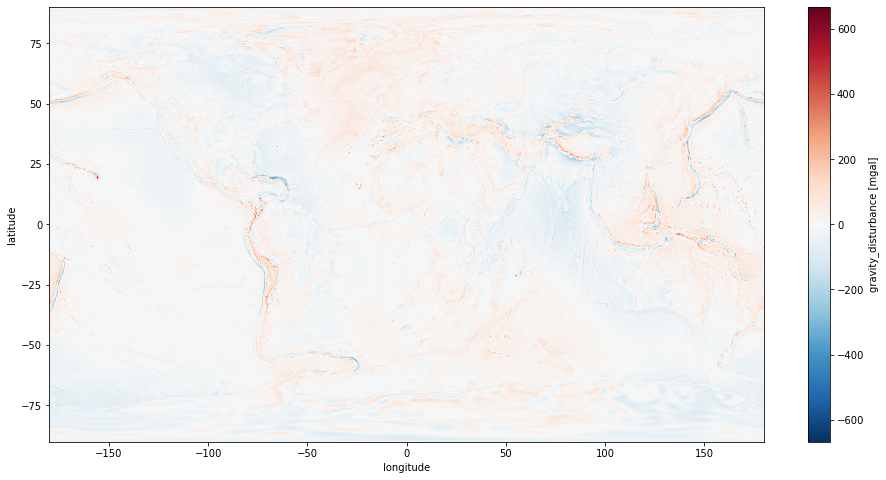

In [6]:
data.gravity_disturbance.plot(figsize=(16, 8))

Notice that the colorbar is centered and all axis are labeled automatically! 🚀

The map we just plotted is showing the **gravity disturbance** for the entire globe. The most noteworthy thing about this map is that disturbance values are very small except for a few places. These generally coincide with **convergent plate boundaries** and **volcanic island chains**, both places where regional isostasy (Airy and Pratt models) are known to not be applicable. 

The gravity disturbance is a good indicator of the overall isostatic state of a region. By looking at the map, we can get a qualitative idea of regional isostasy but we have no good way of comparing different regions quantitavely. For that, we will need to create a model of what observations would be when the Airy or Pratt models of isostasy apply. We can then assess **how well this model fits our data**.

---

## **Your turn!**

Plot the other grids in our dataset: Bouguer gravity disturbance, topography, and smoothed topography. Try using the `"terrain"` colormap for the topography.

---

## Caveat about plotting latitude/longitude coordinates

In the plots above, the pseudo-color maps have evenly spaced longitude and latitude axis. This is troublesome because the Earth is not flat. Longitude lines get closer together as latitude increases towards the poles, which creates distortions in the map. Distortions are unavoidable but we can control them better by using [cartographic projections](https://en.wikipedia.org/wiki/Map_projection). This is handled by the `cartopy` library. 

As an example, let's plot one of the global grids using the [sinusoidal projection](https://en.wikipedia.org/wiki/Sinusoidal_projection).

**Warning:** Many global projections (Robinon, Mollweide, etc) can be extremely slow on large grids like these. 

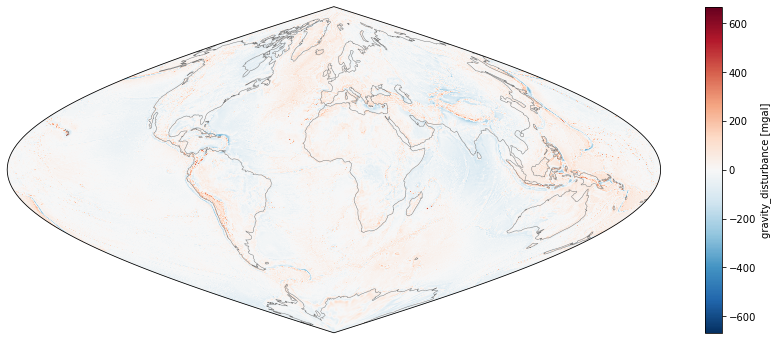

In [9]:
plt.figure(figsize=(16, 6))
# Set the projection in the matplotlib axes 
ax = plt.axes(projection=ccrs.Sinusoidal())
# The transform argument specified which projection the input data are in.
# In our case, they are not projected so we have to specify the 
# PlateCarree projection with is basically just longitude/latitude.
plot = data.gravity_disturbance.sel(longitude=slice(-180, 179)).plot(ax=ax, transform=ccrs.PlateCarree())
# Use the returned axes to plot coastlines on the map.
# Only works if the axes is created using a 
ax.coastlines(color="gray", linewidth=0.5)

## Modelling gravity vs topography




In [12]:
def airy_gravity(topography, density_crust, density_water):
    G = 6.67430e-11
    gravity = xr.where(
        topography >= 0,
        1e5 * -2 * np.pi * G * density_crust * topography,
        1e5 * 2 * np.pi * G * (density_water - density_crust) * topography,
    )
    return gravity
    

In [8]:
model = airy_gravity(data.topography, 2670, 1040)

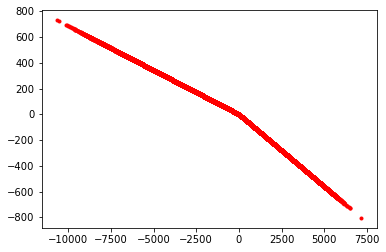

In [9]:
plt.plot(data.topography.values.ravel(), model.values.ravel(), ".r")

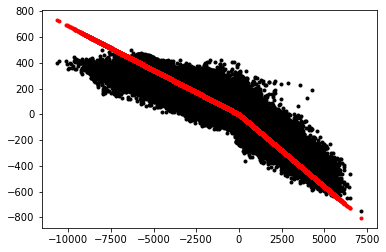

In [10]:
plt.plot(data.topography.values.ravel(), data.gravity_bouguer.values.ravel(), ".k")
plt.plot(data.topography.values.ravel(), model.values.ravel(), ".r")

In [11]:
model2 = airy_gravity(data.topography_smoothed, 2670, 1040)

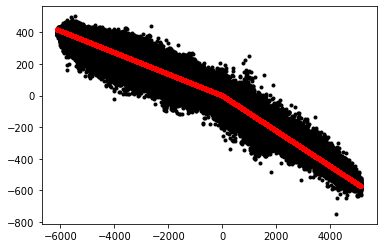

In [12]:
plt.plot(data.topography_smoothed.values.ravel(), data.gravity_bouguer.values.ravel(), ".k")
plt.plot(data.topography_smoothed.values.ravel(), model2.values.ravel(), ".r")

In [13]:
rms = np.linalg.norm(data.gravity_bouguer - model)
print(rms)

46863.76141641219


In [14]:
rms = np.linalg.norm(data.gravity_bouguer - model2)
print(rms)

40963.54606017293


## The isostatic state of Japan

One of the advantages of xarray is that is lets us slice grids using physical coordinates instead of indices. For example, let's cut a section of our data that corresponds to Japan (where the subduction zone might cause interesting features in the data).

In [10]:
japan = data.sel(latitude=slice(28, 46), longitude=slice(124, 158))
japan

<xarray.Dataset>
Dimensions:              (latitude: 91, longitude: 171)
Coordinates:
  * longitude            (longitude) float32 124.0 124.2 124.4 ... 157.8 158.0
  * latitude             (latitude) float32 28.0 28.2 28.4 ... 45.6 45.8 46.0
    height               (latitude, longitude) float32 23.04 23.62 ... 11.22
Data variables:
    gravity_disturbance  (latitude, longitude) float64 21.01 22.0 ... 24.75
    gravity_bouguer      (latitude, longitude) float64 25.93 27.15 ... 362.7
    topography_smoothed  (latitude, longitude) float32 -94.88 ... -5.015e+03
    topography           (latitude, longitude) float32 -71.96 ... -4.945e+03

Now we can plot the smaller grid using a projection and coastlines. In this case, let's go with the [Lambert azimuthal equal-area projection](https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection) centered in Japan.

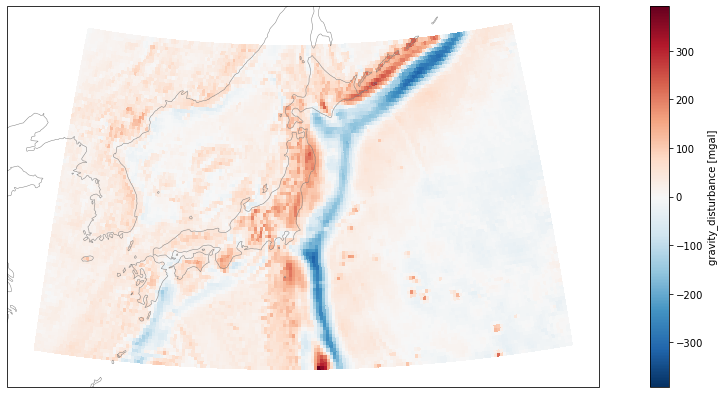

In [18]:
plt.figure(figsize=(18, 7))
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=35, central_longitude=140))
plot = data_japan.gravity_disturbance.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(color="gray", linewidth=0.5)

And we can repeat our modelling calculations for this smaller section of the data using our function from before.

In [13]:
prediction_japan = airy_gravity(japan.topography_smoothed, density_crust=2670, density_water=1040)

Text(0, 0.5, 'Bouguer gravity disturbance (mGal)')

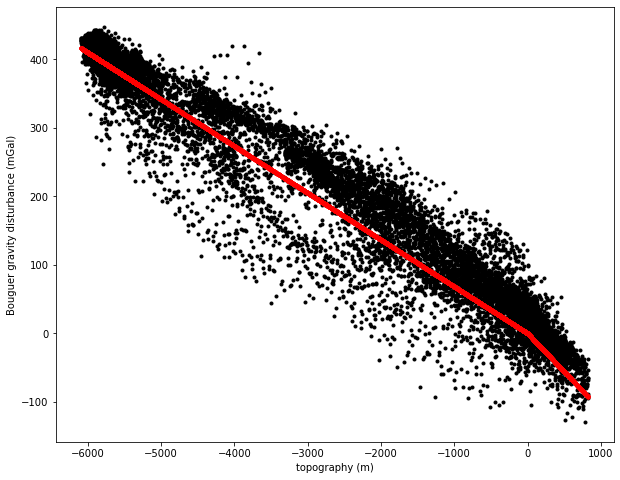

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(japan.topography_smoothed.values.ravel(), japan.gravity_bouguer.values.ravel(), ".k")
plt.plot(japan.topography_smoothed.values.ravel(), prediction_japan.values.ravel(), ".r")
plt.xlabel("topography (m)")
plt.ylabel("Bouguer gravity disturbance (mGal)")

In [17]:
prediction_japan_nonsmooth = airy_gravity(japan.topography, density_crust=2670, density_water=1040)

Text(0, 0.5, 'Bouguer gravity disturbance (mGal)')

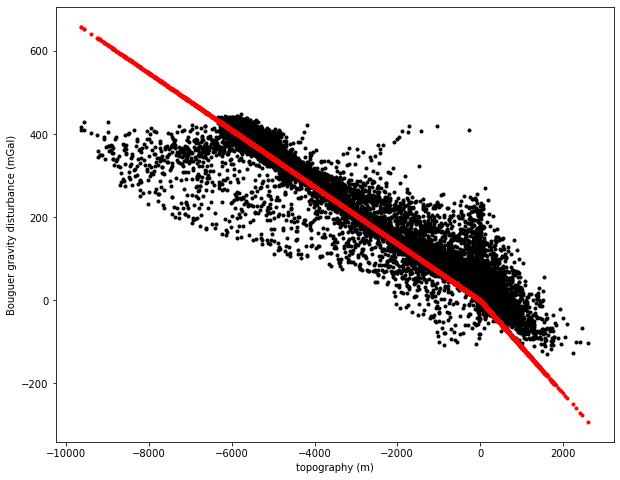

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(japan.topography.values.ravel(), japan.gravity_bouguer.values.ravel(), ".k")
plt.plot(japan.topography.values.ravel(), prediction_japan_nonsmooth.values.ravel(), ".r")
plt.xlabel("topography (m)")
plt.ylabel("Bouguer gravity disturbance (mGal)")

As expected, the model fits the data better if we use a smoothned version of the topography. This removes at lot of the short-wavelength signal from the subduction zone. But even then, the fit to oceanic areas is still poor. This can be explained by the downward flexure of the lithosphere at the subduction zone. The bathymetry we observe there is **not due to isostasy** but instead due to the force of the Pacific subcting underneath Japan.

---

## **Your turn!**

In groups:

1. Choose a region of the Earth (between 10 - 20 degrees wide/tall) and make a slice of the global grids.
1. Calculate the predicted Airy gravity vs topography function and compare against the available data. 
1. Discuss **why** this region is or is not in isostatic equilibrium based on our modelling results. 
1. Share you results and main discussion points with the class.

---

## On your own: Explore different regions 

Now you have the data and code to model gravity vs topography in cases with isostaic equilibrium. Use this freedom to investigate the isostatic state of different geologic settings. Do some exploring on your own time and try to connect what you find with concepts you've learned or researched about the geologic setting of each region.

Here are some places you can try:

* Mid-ocean ridges
* Rift valleys
* Mountain ranges
* Large depressions in the continents
* Cratonic areas at the center of large continents
* Subduction zones

Use the cells below to write your code (add more if needed with the `+` button in the toolbar).